In [1]:
from sklearn import datasets, svm
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

In [2]:
svc = svm.SVC(C=1, kernel='linear')
svc.fit(X_digits[:-100], y_digits[:-100]).score(X_digits[-100:], y_digits[-100:])

0.98

In [3]:
import numpy as np
X_folds = np.array_split(X_digits, 3)
y_folds = np.array_split(y_digits, 3)
scores = list()
for k in range(3):
    X_train = X_folds.copy()
    X_test = X_train.pop(k)
    X_train = np.concatenate(X_train)
    y_train = y_folds.copy()
    y_test = y_train.pop(k)
    y_train = np.concatenate(y_train)
    scores.append(svc.fit(X_train, y_train).score(X_test, y_test))
print(scores)

[0.9348914858096828, 0.9565943238731218, 0.9398998330550918]


In [4]:
from sklearn.model_selection import KFold, cross_val_score
X = ['a','a','a','b','b','c','c','c','c','c']
k_fold = KFold(n_splits=5)
for train_indices, test_indices in k_fold.split(X):
    print('Train: {} test: {}'.format(train_indices, test_indices))

Train: [2 3 4 5 6 7 8 9] test: [0 1]
Train: [0 1 4 5 6 7 8 9] test: [2 3]
Train: [0 1 2 3 6 7 8 9] test: [4 5]
Train: [0 1 2 3 4 5 8 9] test: [6 7]
Train: [0 1 2 3 4 5 6 7] test: [8 9]


In [5]:
[svc.fit(X_digits[train], y_digits[train]).score(X_digits[test], y_digits[test]) for train, test in k_fold.split(X_digits)]

[0.9638888888888889,
 0.9222222222222223,
 0.9637883008356546,
 0.9637883008356546,
 0.9303621169916435]

In [7]:
C_s = np.logspace(-10, 10)
k_fold = KFold(n_splits=5)
scores = list()
scores_std = list()
for C in C_s:
    svc = svm.SVC(C=C, kernel='linear')
    this_scores = cross_val_score(svc, X_digits, y_digits, cv=k_fold)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

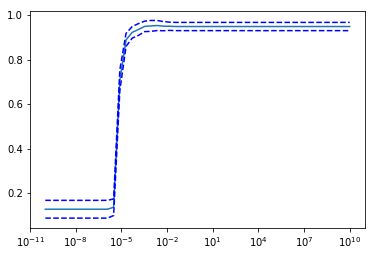

In [19]:
import matplotlib.pyplot as plt
plt.figure()
plt.semilogx(C_s, scores)
plt.semilogx(C_s, np.array(scores) + np.array(scores_std), 'b--')
plt.semilogx(C_s, np.array(scores) - np.array(scores_std), 'b--')
locs, labels = plt.yticks()
plt.show()

In [24]:
from sklearn.model_selection import GridSearchCV, cross_val_score
Cs = np.logspace(-6, -1, 10)
clf = GridSearchCV(estimator=svc, param_grid=dict(C=Cs), n_jobs=-1)
clf.fit(X_digits[:1000], y_digits[:1000])

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([1.00000e-06, 3.59381e-06, 1.29155e-05, 4.64159e-05, 1.66810e-04,
       5.99484e-04, 2.15443e-03, 7.74264e-03, 2.78256e-02, 1.00000e-01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [27]:
clf.best_score_
clf.best_estimator_.C

0.007742636826811277

In [28]:
clf.score(X_digits[1000:], y_digits[1000:])

0.9435382685069009